# PREDIÇÃO SATISFAÇÃO DO CLIENTE - OLIST

## DESCRIÇÃO OLIST - PLATAFORMA DE E-COMMERCE

"Conjunto de dados públicos de comércio eletrônico brasileiro por Olist
O conjunto de dados tem informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil.

A Olist conecta pequenas empresas de todo o Brasil a canais sem complicações e com um único contrato. Esses comerciantes podem vender seus produtos através da Olist Store e enviá-los diretamente aos clientes usando os parceiros de logística da Olist.

Depois que um cliente compra o produto da Olist Store, um vendedor é notificado para atender esse pedido. Assim que o cliente recebe o produto, ou vence a data prevista de entrega, o cliente recebe uma pesquisa de satisfação por e-mail onde pode dar uma nota da experiência de compra e anotar alguns comentários."


## Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import glob
import pandas as pd

# Leitura dos dados

Each feature or columns of different csv files are described below:

* The  `olist_customers_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**customer_id** | Id of the consumer who made the purchase.
**customer_unique_id**    | Unique Id of the consumer.
**customer_zip_code_prefix** | Zip Code of the location of the consumer.
**customer_city** | Name of the City from where order is made.
**customer_state** |  State Code from where order is made(Ex- sao paulo-SP).

* The `olist_sellers_dataset.csv` contains following features:

Feature | Description 
----------|---------------
**seller_id** |   Unique Id of the seller registered in olist.
**seller_zip_code_prefix** | Zip Code of the location of the seller.
**seller_city** | Name of the City of the seller.
**seller_state** | State Code (Ex- sao paulo-SP)


* The `olist_order_items_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**order_item_id** | A Unique id given to each item ordered in the order.
**product_id** |A unique id given to each product available on the site.
**seller_id** | Unique Id of the seller registered in olist.
**shipping_limit_date** | The date before which shipping of the ordered    product must be completed.
**price** | Actual price of the products ordered .
**freight_value** | Price rate at which a product is delivered from one point to another. 

* The `olist_order_payments_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**payment_sequential** | sequences of the payments made in case of EMI.
**payment_type** |  mode of payment used.(Ex-Credit Card)
**payment_installments** | number of installments in case of EMI purchase.
**payment_value** | Total amount paid for the purshase order.



* The `olist_orders_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**order_id** | A unique id of order made by the consumers.
**customer_id** | Id of the consumer who made the purchase.
**order_status** | status of the order made i.e delivered, shipped etc.
**order_purchase_timestamp** | Timestamp of the purchase.
**order_approved_at** | Timestamp of the order approval.
**order_delivered_carrier_date** | delivery date at which carrier made the delivery.
**order_delivered_customer_date** | date at which customer got the product.
**order_estimated_delivery_date** | estimated delivery date of the products.


* The `olist_order_reviews_dataset.csv`  contain following features:

Feature | Description 
----------|---------------
**review_id** |Id of the review given on the product ordered by the order id.
**order_id** |  A unique id of order made by the consumers.
**review_score** | review score given by the customer for each order on the scale of 1–5. 
**review_comment_title** | Title of the review
**review_comment_message** | Review comments posted by the consumer for each order.
**review_creation_date** |Timestamp of the review when it is created.
**review_answer_timestamp** | Timestamp of the review answered.


* The `olist_products_dataset.csv` contain following features:

Feature | Description 
----------|---------------
**product_id** | A unique identifier for the proposed project.
**product_category_name** | Name of the product category
**product_name_lenght** | length of the string which specify the name given to the products ordered.
**product_description_lenght** | length of the description written for each product ordered on the site.
**product_photos_qty** | Number of photos of each product ordered available on the shopping portal.
**product_weight_g** | Weight of the products ordered in grams.
**product_length_cm** | Length of the products ordered in centimeters.
**product_height_cm** | Height of the products ordered in centimeters.
**product_width_cm** | width of the product ordered in centimeters.


# Leitura arquivos

In [2]:
items = pd.read_csv("Data/olist_order_items_dataset.csv") 

In [3]:
order = pd.read_csv("Data/olist_orders_dataset.csv")  

In [4]:
products = pd.read_csv("Data/olist_products_dataset.csv")  

In [5]:
geolocation = pd.read_csv("Data/olist_geolocation_dataset.csv")  

In [6]:
reviews = pd.read_csv("Data/olist_order_reviews_dataset.csv")  

In [7]:
customers = pd.read_csv("Data/olist_customers_dataset.csv") 

In [8]:
payments = pd.read_csv("Data/olist_order_payments_dataset.csv") 

In [9]:
seller = pd.read_csv("Data/olist_sellers_dataset.csv") 

In [10]:
print(items.shape)
items.head(2)

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [11]:
print(order.shape)
order.head(2)

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [12]:
print(products.shape)
products.head(2)

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [13]:
print(geolocation.shape)
geolocation.head(2)

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [14]:
print(reviews.shape)
reviews.head(2)

(99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [15]:
print(customers.shape)
customers.head(2)

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [16]:
print(payments.shape)
payments.head(2)

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [17]:
print(seller.shape)
seller.head(2)

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


# Limpando dados

## Clientes - customers

Tabela de clientes 99441 linhas  5 colunas ('customer_id', 'customer_unique_id', customer_zip_code_prefix','customer_city', 'customer_state')

In [18]:
customers.shape

(99441, 5)

In [19]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [20]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [21]:
customers.duplicated(subset=['customer_unique_id']).astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
99436    0
99437    0
99438    0
99439    0
99440    0
Length: 99441, dtype: int32

In [22]:
customers.drop(['customer_city', 'customer_unique_id'], axis=1, inplace=True)
customers.rename(columns={"customer_state": "state_code"}, inplace=True)

In [23]:
customers.columns

Index(['customer_id', 'customer_zip_code_prefix', 'state_code'], dtype='object')

### Envio do arquivo limpo- clientes.csv

In [24]:
customers.to_csv('Data/clientes.csv')

## Ordens - order

Tabela 'ordens' tem 99441 linhas e 9 colunas ('order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
'order_approved_at', 'order_delivered_carrier_date',
'order_delivered_customer_date', 'order_estimated_delivery_date)


Nulos (order_approved_at - 160, order_delivered_carrier_date -  1783, order_delivered_customer_date- 2965)

In [25]:
order.shape

(99441, 8)

In [26]:
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [27]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [28]:
order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

### Tratando linhas nulas(ordens

Tratando dados nulos com dados de colunas próximas

In [29]:
order["order_approved_at"].fillna(order["order_purchase_timestamp"], inplace=True)
order["order_delivered_customer_date"].fillna(order["order_estimated_delivery_date"], inplace=True)
order["order_delivered_carrier_date"].fillna(order["order_delivered_customer_date"], inplace=True)

In [30]:
order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

### Alterando data type

In [31]:
times_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date']
for col in times_cols:
    order[col] = pd.to_datetime(order[col])    

In [32]:
order['prazo_entrega']= (order['order_estimated_delivery_date'] - order['order_delivered_customer_date']).astype('timedelta64[D]')

In [33]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   prazo_entrega                  99441 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.8+ MB


### Envio do arquivo limpo- ordens.csv

In [34]:
order.to_csv('Data/ordens.csv')

## Produtos - products

Tabela com 32340 linhas com 6 colunas

In [35]:
products.shape

(32951, 9)

In [36]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [37]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [38]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [39]:
products['product_category_name'].value_counts().head(10)

cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_category_name, dtype: int64

In [40]:
products['product_category_name'] = products['product_category_name'].fillna('not_reported')

### Envio do arquivo limpo- produtos.csv

In [41]:
products.to_csv('Data/produtos.csv')

## Avaliações - reviews

Tabela 'avaliacoes' tem 99224 linhas e 7 colunas (review_id,order_id, review_score, 
review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp)

In [42]:
reviews.shape

(99224, 7)

In [43]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [44]:
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [45]:
reviews.drop_duplicates(subset=['order_id'], keep='last', ignore_index=True, inplace=True)
reviews.drop_duplicates(subset=['review_id'], keep=False, ignore_index=True, inplace=True)

In [46]:
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'], format='%Y/%m/%d')
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'], format='%Y/%m/%d')

In [47]:
reviews['tempo_resposta'] = (reviews['review_creation_date'] - reviews['review_answer_timestamp']).dt.days

In [48]:
reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'tempo_resposta'],
      dtype='object')

### Envio do arquivo limpo- avalicoes.csv

In [49]:
reviews.to_csv('Data/avaliacoes.csv')

## Vendedores - Seller

Tabela de vendedores 3095 linhas  5 colunas ('seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state')

In [50]:
seller.shape

(3095, 4)

In [51]:
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [52]:
seller.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [53]:
seller.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

### Envio do arquivo limpo- vendedores.csv

In [54]:
seller.to_csv('Data/vendedores.csv')

## Pagamentos - payments

Tabela de pagamentos 103886 linhas  5 colunas ('order_id', 'payment_sequential', 'payment_type','payment_installments', 'payment_value')

In [55]:
payments.shape

(103886, 5)

In [56]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [57]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [58]:
payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [59]:
payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [60]:
payments.groupby('payment_type').size()

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
dtype: int64

In [61]:
payments.loc[payments['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [62]:
payments.drop(index=payments.loc[payments['payment_type']=='not_defined'].index, inplace=True)

In [63]:
payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

### Envio do arquivo limpo- pagamentos.csv

In [64]:
payments.to_csv('Data/pagamentos.csv')

## Geocalização

In [65]:
geolocation.shape

(1000163, 5)

In [66]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [67]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [68]:
geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [69]:
geo_customer = geolocation.rename(columns={"geolocation_zip_code_prefix":"customer_zip_code_prefix",
                                                  "geolocation_lat":"customer_lat",
                                                  "geolocation_lng":"customer_lng"})
geo_seller = geolocation.rename(columns={"geolocation_zip_code_prefix":"seller_zip_code_prefix",
                                                  "geolocation_lat":"seller_lat",
                                                  "geolocation_lng":"seller_lng"})
geo_customer.head(3)

,customer_zip_code_prefix,customer_lat,customer_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


### Envio do arquivo limpo- geolocal.csv

In [70]:
geolocation.to_csv('Data/geolocal.csv')

# DataFrame original para merge

In [71]:
itens = pd.read_csv("Data/itens.csv") 
#ordens = pd.read_csv("Data/ordens.csv")
#produtos = pd.read_csv("Data/produtos.csv")
geolocal = pd.read_csv("Data/geolocal.csv")
clientes = pd.read_csv("Data/clientes.csv")
avaliacoes = pd.read_csv('Data/avaliacoes.csv')
#vendedores = pd.read_csv("Data/vendedores.csv")
pagamentos = pd.read_csv('Data/pagamentos.csv')


## Colunas finais 

In [75]:
final_df = vendedores.merge(itens, on='seller_id', how='left')

In [76]:
final_df = final_df.merge(ordens, left_on='order_id', right_on='order_id', how='right')

In [77]:
final_df = final_df.merge(produtos, left_on='product_id', right_on='product_id',how='left' )

C:\Users\USER\AppData\Local\Temp\ipykernel_9096\2733312986.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  final_df = final_df.merge(produtos, left_on='product_id', right_on='product_id',how='left' )


In [79]:
final_df = final_df.merge(avaliacoes, on = 'order_id', how = 'inner')

In [80]:
print(final_df.shape)
final_df.head(2)

(111209, 38)


,Unnamed: 0_x,seller_id,seller_zip_code_prefix,seller_city,seller_state,Unnamed: 0_y,order_id,order_item_id,product_id,shipping_limit_date,...,product_height_cm,product_width_cm,Unnamed: 0,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,tempo_resposta
0,559.0,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,maua,SP,100785.0,e481f51cbdc54678b7cc49136f2d6af7,1.0,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,...,8.0,13.0,32206,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,-2
1,549.0,289cdb325fb7e7f891c38608bf9e0962,31570.0,belo horizonte,SP,36896.0,53cdb2fc8bc7dce0b6741e2150273451,1.0,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,...,13.0,19.0,28635,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,-1


# Analisando dados ausentes - DataFrame final

In [81]:
total = final_df.isnull().sum().sort_values(ascending=False)
percent = (final_df.isnull().sum()/final_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
review_comment_title,97794,0.879371
review_comment_message,63798,0.573677
product_photos_qty,2270,0.020412
product_description_lenght,2270,0.020412
product_name_lenght,2270,0.020412


## Fazendo Drop colunas

Dropando as colunas 'review_comment_title', 'review_comment_message'

In [83]:
final_df.drop(['review_comment_title', 'review_comment_message'],axis=1, inplace=True)

In [84]:
print(final_df.shape)
final_df.head(2)

(111209, 36)


,Unnamed: 0_x,seller_id,seller_zip_code_prefix,seller_city,seller_state,Unnamed: 0_y,order_id,order_item_id,product_id,shipping_limit_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Unnamed: 0,review_id,review_score,review_creation_date,review_answer_timestamp,tempo_resposta
0,559.0,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,maua,SP,100785.0,e481f51cbdc54678b7cc49136f2d6af7,1.0,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,...,500.0,19.0,8.0,13.0,32206,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48,-2
1,549.0,289cdb325fb7e7f891c38608bf9e0962,31570.0,belo horizonte,SP,36896.0,53cdb2fc8bc7dce0b6741e2150273451,1.0,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,...,400.0,19.0,13.0,19.0,28635,8d5266042046a06655c8db133d120ba5,4,2018-08-08 00:00:00,2018-08-08 18:37:50,-1


## Fazendo Drop Duplicates

In [85]:
geolocal.drop_duplicates(inplace=True)

# Criando Dataframe Final

In [92]:
final_df.to_csv('Data/final_df.csv')

# Gráficos

In [89]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = final_df.customer_state.value_counts().sort_values(ascending=False)[0:10].plot(kind='bar', color = 'grey', alpha=0.8)
ax.set_title("Top 10 - Estados consumidores do Brasil")
ax.set_xlabel("States")
plt.xticks(rotation=35)
ax.set_ylabel("Nº de consumidores")
plt.show()

NameError: name 'plt' is not defined

In [91]:
final_df.loc[final_df['seller_id']>=100].plot.scatter(x='review_score', y='seller_id')

TypeError: '>=' not supported between instances of 'str' and 'int'

<AxesSubplot:ylabel='Frequency'>

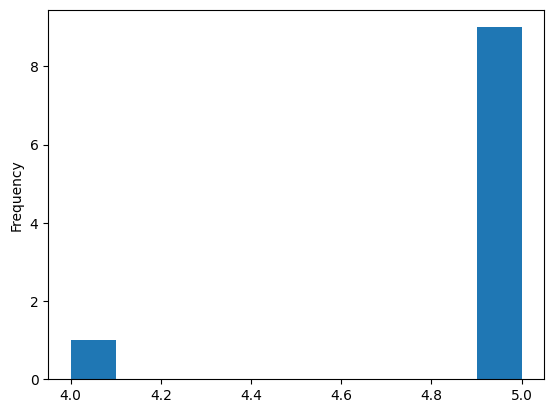

In [90]:
final_df.loc[final_df['seller_id']=='5b2e94f2c22b39ccc24d34ad0f669672','review_score'].plot.hist()

## Analisando crescimento por periodo

In [ ]:
total_orders_month_year = ordens.groupby('order_purchase_year_month')['order_id'].nunique().reset_index()
plt.figure(figsize = (18,7))
sns.barplot(data = total_orders_month_year,
             x = 'order_purchase_year_month',
             y = 'order_id')
plt.suptitle("Total orders by year_month")

## Localização

In [ ]:
from opencage.geocoder import OpenCageGeocode
